# Prediction with Binomial Logistic Regression

In [21]:
#Impporting libraries
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay, confusion_matrix, precision_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [2]:
# importing of data
def read_data():
    path="D:/DATA SCIENCE/date_wise/Assignments/Nov_19/4. Logistic Regresssion/bank-full.csv"
    data=pd.read_csv(path)
    return data

In [3]:
#Calling function
data=read_data()
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [4]:
# Data copying
df=data.copy()
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


### EDA(Exploratory Data Analysis)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [7]:
df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [8]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [10]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [11]:
df.shape

(45211, 17)

In [12]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [22]:
df.job.value_counts()

job
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: count, dtype: int64

<Axes: xlabel='job', ylabel='count'>

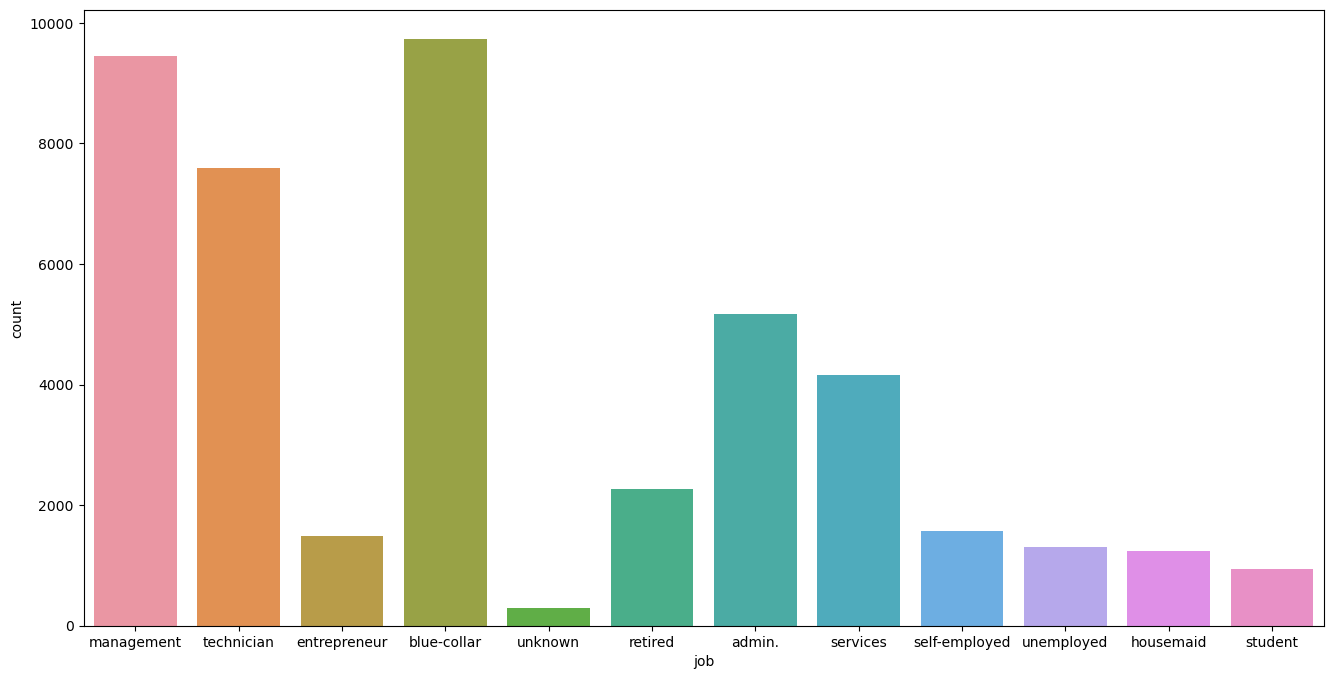

In [24]:
plt.figure(figsize = (16,8))
sns.countplot(x = df['job'])

In [25]:
df['marital'].value_counts()

marital
married     27214
single      12790
divorced     5207
Name: count, dtype: int64

<Axes: xlabel='marital', ylabel='count'>

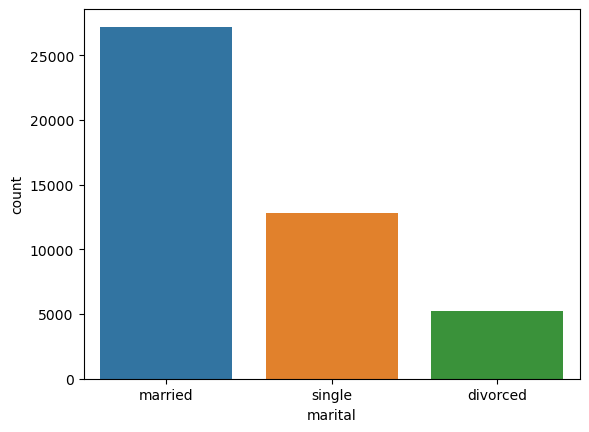

In [26]:
sns.countplot(x = df['marital'])

In [27]:
df['education'].value_counts()

education
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: count, dtype: int64

<Axes: xlabel='education', ylabel='count'>

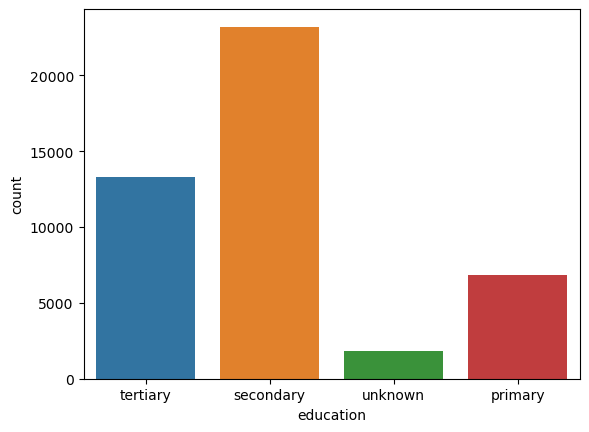

In [28]:
sns.countplot(x = df['education'])

In [29]:
data['loan'].value_counts()

loan
no     37967
yes     7244
Name: count, dtype: int64

<Axes: xlabel='loan', ylabel='count'>

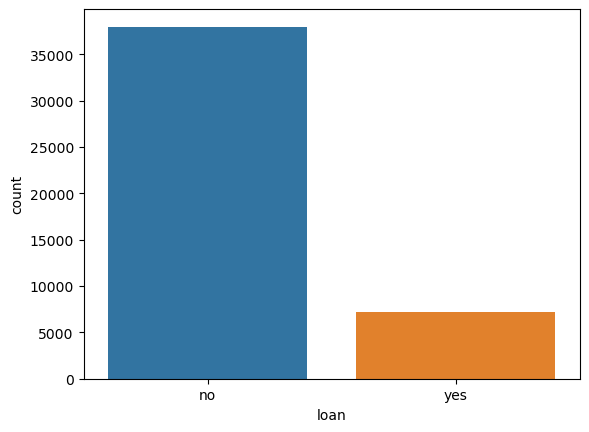

In [30]:
sns.countplot(x = df['loan'])

<Axes: xlabel='balance', ylabel='Count'>

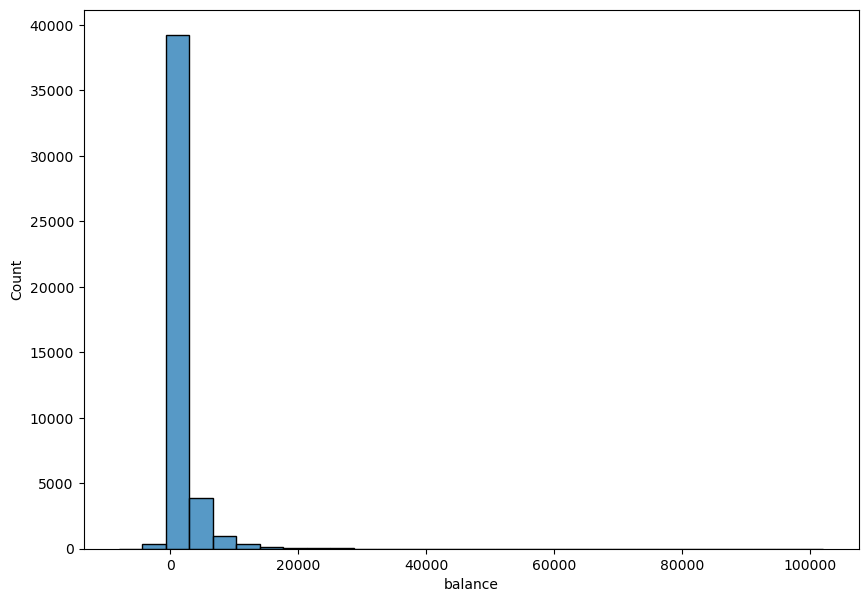

In [31]:
plt.figure(figsize = (10,7))
sns.histplot(x = df['balance'],bins = 30)

<Axes: xlabel='job', ylabel='count'>

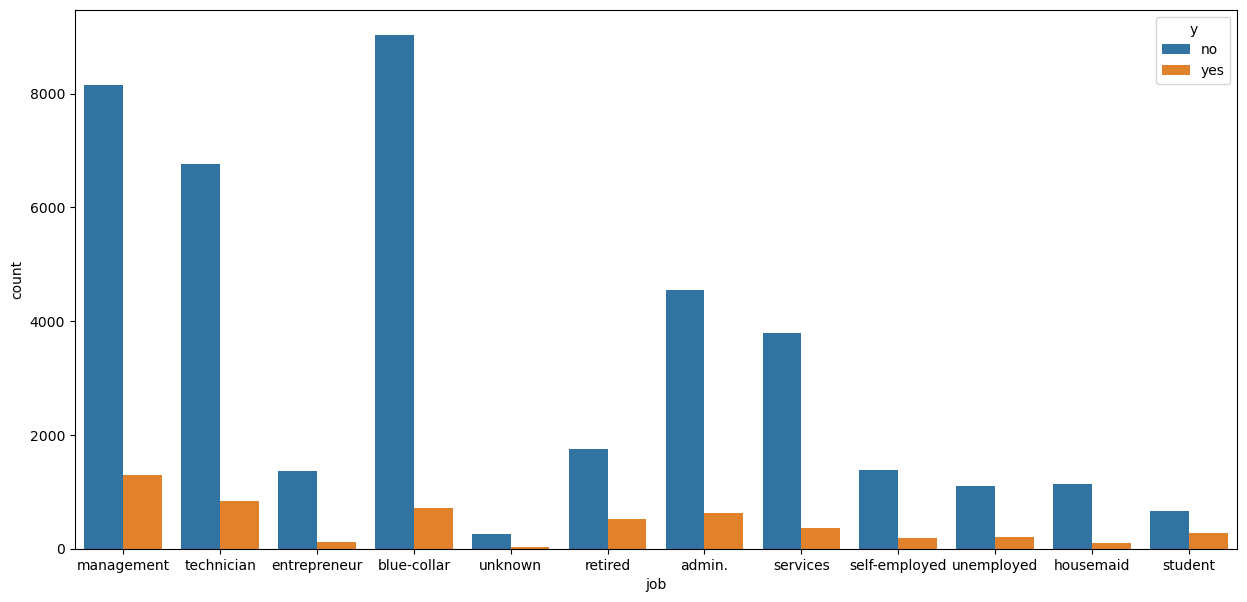

In [32]:
plt.figure(figsize = (15,7))
sns.countplot(x = df['job'],hue = 'y', data  =df)

<Axes: xlabel='marital', ylabel='count'>

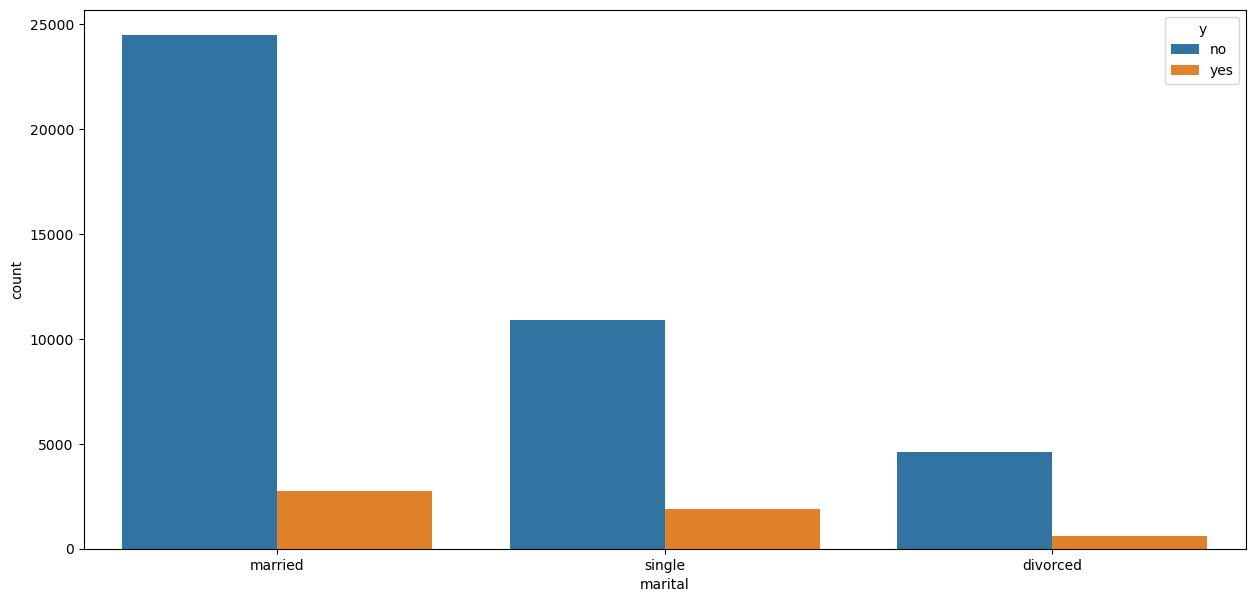

In [34]:
plt.figure(figsize = (15,7))
sns.countplot(x =df['marital'],hue = 'y', data=df)

In [35]:
 df.poutcome.value_counts()

poutcome
unknown    36959
failure     4901
other       1840
success     1511
Name: count, dtype: int64

In [36]:
# dropping the unwanted columns which don't have direct effect over outcome
df.drop(['education','contact','day','month','duration','previous'],axis = 1,inplace = True)
print(df)

       age           job   marital default  balance housing loan  campaign  \
0       58    management   married      no     2143     yes   no         1   
1       44    technician    single      no       29     yes   no         1   
2       33  entrepreneur   married      no        2     yes  yes         1   
3       47   blue-collar   married      no     1506     yes   no         1   
4       33       unknown    single      no        1      no   no         1   
...    ...           ...       ...     ...      ...     ...  ...       ...   
45206   51    technician   married      no      825      no   no         3   
45207   71       retired  divorced      no     1729      no   no         2   
45208   72       retired   married      no     5715      no   no         5   
45209   57   blue-collar   married      no      668      no   no         4   
45210   37  entrepreneur   married      no     2971      no   no         2   

       pdays poutcome    y  
0         -1  unknown   no  
1    

In [38]:
df.columns

Index(['age', 'job', 'marital', 'default', 'balance', 'housing', 'loan',
       'campaign', 'pdays', 'poutcome', 'y'],
      dtype='object')

In [40]:
df['job'].value_counts()

job
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: count, dtype: int64

In [42]:
# We will encode this using one-hot encoding method
dum = pd.get_dummies(df['job'])
df= pd.concat([df,dum],axis = 1)
df

,age,job,marital,default,balance,housing,loan,campaign,pdays,poutcome,...,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown
0,58,management,married,no,2143,yes,no,1,-1,unknown,...,False,False,True,False,False,False,False,False,False,False
1,44,technician,single,no,29,yes,no,1,-1,unknown,...,False,False,False,False,False,False,False,True,False,False
2,33,entrepreneur,married,no,2,yes,yes,1,-1,unknown,...,True,False,False,False,False,False,False,False,False,False
3,47,blue-collar,married,no,1506,yes,no,1,-1,unknown,...,False,False,False,False,False,False,False,False,False,False
4,33,unknown,single,no,1,no,no,1,-1,unknown,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,no,825,no,no,3,-1,unknown,...,False,False,False,False,False,False,False,True,False,False
45207,71,retired,divorced,no,1729,no,no,2,-1,unknown,...,False,False,False,True,False,False,False,False,False,False
45208,72,retired,married,no,5715,no,no,5,184,success,...,False,False,False,True,False,False,False,False,False,False
45209,57,blue-collar,married,no,668,no,no,4,-1,unknown,...,False,False,False,False,False,False,False,False,False,False


In [43]:
df['marital'].value_counts()

marital
married     27214
single      12790
divorced     5207
Name: count, dtype: int64

In [45]:
dum_1=pd.get_dummies(df['marital'])
df=pd.concat([df,dum_1],axis=1)
df

,age,job,marital,default,balance,housing,loan,campaign,pdays,poutcome,...,retired,self-employed,services,student,technician,unemployed,unknown,divorced,married,single
0,58,management,married,no,2143,yes,no,1,-1,unknown,...,False,False,False,False,False,False,False,False,True,False
1,44,technician,single,no,29,yes,no,1,-1,unknown,...,False,False,False,False,True,False,False,False,False,True
2,33,entrepreneur,married,no,2,yes,yes,1,-1,unknown,...,False,False,False,False,False,False,False,False,True,False
3,47,blue-collar,married,no,1506,yes,no,1,-1,unknown,...,False,False,False,False,False,False,False,False,True,False
4,33,unknown,single,no,1,no,no,1,-1,unknown,...,False,False,False,False,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,no,825,no,no,3,-1,unknown,...,False,False,False,False,True,False,False,False,True,False
45207,71,retired,divorced,no,1729,no,no,2,-1,unknown,...,True,False,False,False,False,False,False,True,False,False
45208,72,retired,married,no,5715,no,no,5,184,success,...,True,False,False,False,False,False,False,False,True,False
45209,57,blue-collar,married,no,668,no,no,4,-1,unknown,...,False,False,False,False,False,False,False,False,True,False


In [46]:
#Now dropping 'job' and 'marital' column
df.drop(['job','marital'],axis = 1 , inplace = True)
df

,age,default,balance,housing,loan,campaign,pdays,poutcome,y,admin.,...,retired,self-employed,services,student,technician,unemployed,unknown,divorced,married,single
0,58,no,2143,yes,no,1,-1,unknown,no,False,...,False,False,False,False,False,False,False,False,True,False
1,44,no,29,yes,no,1,-1,unknown,no,False,...,False,False,False,False,True,False,False,False,False,True
2,33,no,2,yes,yes,1,-1,unknown,no,False,...,False,False,False,False,False,False,False,False,True,False
3,47,no,1506,yes,no,1,-1,unknown,no,False,...,False,False,False,False,False,False,False,False,True,False
4,33,no,1,no,no,1,-1,unknown,no,False,...,False,False,False,False,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,no,825,no,no,3,-1,unknown,yes,False,...,False,False,False,False,True,False,False,False,True,False
45207,71,no,1729,no,no,2,-1,unknown,yes,False,...,True,False,False,False,False,False,False,True,False,False
45208,72,no,5715,no,no,5,184,success,yes,False,...,True,False,False,False,False,False,False,False,True,False
45209,57,no,668,no,no,4,-1,unknown,no,False,...,False,False,False,False,False,False,False,False,True,False


In [48]:
dum2 = pd.get_dummies(df['poutcome'])
df = pd.concat([df,dum2],axis =1)
df

,age,default,balance,housing,loan,campaign,pdays,poutcome,y,admin.,...,married,single,failure,other,success,unknown,failure,other,success,unknown
0,58,no,2143,yes,no,1,-1,unknown,no,False,...,True,False,False,False,False,True,False,False,False,True
1,44,no,29,yes,no,1,-1,unknown,no,False,...,False,True,False,False,False,True,False,False,False,True
2,33,no,2,yes,yes,1,-1,unknown,no,False,...,True,False,False,False,False,True,False,False,False,True
3,47,no,1506,yes,no,1,-1,unknown,no,False,...,True,False,False,False,False,True,False,False,False,True
4,33,no,1,no,no,1,-1,unknown,no,False,...,False,True,False,False,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,no,825,no,no,3,-1,unknown,yes,False,...,True,False,False,False,False,True,False,False,False,True
45207,71,no,1729,no,no,2,-1,unknown,yes,False,...,False,False,False,False,False,True,False,False,False,True
45208,72,no,5715,no,no,5,184,success,yes,False,...,True,False,False,False,True,False,False,False,True,False
45209,57,no,668,no,no,4,-1,unknown,no,False,...,True,False,False,False,False,True,False,False,False,True


In [49]:
#Now dropping 'poutcome' column
df.drop(['poutcome'],axis = 1 , inplace = True)
df

,age,default,balance,housing,loan,campaign,pdays,y,admin.,blue-collar,...,married,single,failure,other,success,unknown,failure,other,success,unknown
0,58,no,2143,yes,no,1,-1,no,False,False,...,True,False,False,False,False,True,False,False,False,True
1,44,no,29,yes,no,1,-1,no,False,False,...,False,True,False,False,False,True,False,False,False,True
2,33,no,2,yes,yes,1,-1,no,False,False,...,True,False,False,False,False,True,False,False,False,True
3,47,no,1506,yes,no,1,-1,no,False,True,...,True,False,False,False,False,True,False,False,False,True
4,33,no,1,no,no,1,-1,no,False,False,...,False,True,False,False,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,no,825,no,no,3,-1,yes,False,False,...,True,False,False,False,False,True,False,False,False,True
45207,71,no,1729,no,no,2,-1,yes,False,False,...,False,False,False,False,False,True,False,False,False,True
45208,72,no,5715,no,no,5,184,yes,False,False,...,True,False,False,False,True,False,False,False,True,False
45209,57,no,668,no,no,4,-1,no,False,True,...,True,False,False,False,False,True,False,False,False,True


In [50]:
## Here, we are changing the values 'yes' and 'no' of columns'default','housing','loan' and 'y' to 1 and 0
d = {'yes':1,'no':0}
df['default'] = df['default'].map(d)
d1 = {'yes':1,'no':0}
df['housing'] = df['housing'].map(d1)
d2 = {'yes':1,'no':0}
df['loan'] = df['loan'].map(d2)
d3={'yes':1,'no':0}
df['y']=df['y'].map(d3)


In [51]:
df

,age,default,balance,housing,loan,campaign,pdays,y,admin.,blue-collar,...,married,single,failure,other,success,unknown,failure,other,success,unknown
0,58,0,2143,1,0,1,-1,0,False,False,...,True,False,False,False,False,True,False,False,False,True
1,44,0,29,1,0,1,-1,0,False,False,...,False,True,False,False,False,True,False,False,False,True
2,33,0,2,1,1,1,-1,0,False,False,...,True,False,False,False,False,True,False,False,False,True
3,47,0,1506,1,0,1,-1,0,False,True,...,True,False,False,False,False,True,False,False,False,True
4,33,0,1,0,0,1,-1,0,False,False,...,False,True,False,False,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,0,825,0,0,3,-1,1,False,False,...,True,False,False,False,False,True,False,False,False,True
45207,71,0,1729,0,0,2,-1,1,False,False,...,False,False,False,False,False,True,False,False,False,True
45208,72,0,5715,0,0,5,184,1,False,False,...,True,False,False,False,True,False,False,False,True,False
45209,57,0,668,0,0,4,-1,0,False,True,...,True,False,False,False,False,True,False,False,False,True


In [62]:
#'y' is our dependent variable here
# Storing the data columns in X and  variables
X = df.drop(['y'],axis =1)
y_final = df['y']

In [53]:
#Now, we are using Standard Scaler here to scale the values
st=StandardScaler()

In [56]:
X_transform = st.fit_transform(X)
X_transform

array([[ 1.60696496, -0.13548989,  0.25641925, ..., -0.20597248,
        -0.185948  ,  0.47251925],
       [ 0.28852927, -0.13548989, -0.43789469, ..., -0.20597248,
        -0.185948  ,  0.47251925],
       [-0.74738448, -0.13548989, -0.44676247, ..., -0.20597248,
        -0.185948  ,  0.47251925],
       ...,
       [ 2.92540065, -0.13548989,  1.42959305, ..., -0.20597248,
         5.37784754, -2.11631591],
       [ 1.51279098, -0.13548989, -0.22802402, ..., -0.20597248,
        -0.185948  ,  0.47251925],
       [-0.37068857, -0.13548989,  0.52836436, ...,  4.85501757,
        -0.185948  , -2.11631591]])

In [59]:
#Converting into dataframe
X_data = pd.DataFrame(X_transform,columns=X.columns)
X_data

,age,default,balance,housing,loan,campaign,pdays,admin.,blue-collar,entrepreneur,...,married,single,failure,other,success,unknown,failure,other,success,unknown
0,1.606965,-0.13549,0.256419,0.893915,-0.436803,-0.569351,-0.411453,-0.359369,-0.523740,-0.184415,...,0.813212,-0.628090,-0.348687,-0.205972,-0.185948,0.472519,-0.348687,-0.205972,-0.185948,0.472519
1,0.288529,-0.13549,-0.437895,0.893915,-0.436803,-0.569351,-0.411453,-0.359369,-0.523740,-0.184415,...,-1.229691,1.592128,-0.348687,-0.205972,-0.185948,0.472519,-0.348687,-0.205972,-0.185948,0.472519
2,-0.747384,-0.13549,-0.446762,0.893915,2.289359,-0.569351,-0.411453,-0.359369,-0.523740,5.422561,...,0.813212,-0.628090,-0.348687,-0.205972,-0.185948,0.472519,-0.348687,-0.205972,-0.185948,0.472519
3,0.571051,-0.13549,0.047205,0.893915,-0.436803,-0.569351,-0.411453,-0.359369,1.909346,-0.184415,...,0.813212,-0.628090,-0.348687,-0.205972,-0.185948,0.472519,-0.348687,-0.205972,-0.185948,0.472519
4,-0.747384,-0.13549,-0.447091,-1.118674,-0.436803,-0.569351,-0.411453,-0.359369,-0.523740,-0.184415,...,-1.229691,1.592128,-0.348687,-0.205972,-0.185948,0.472519,-0.348687,-0.205972,-0.185948,0.472519
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,0.947747,-0.13549,-0.176460,-1.118674,-0.436803,0.076230,-0.411453,-0.359369,-0.523740,-0.184415,...,0.813212,-0.628090,-0.348687,-0.205972,-0.185948,0.472519,-0.348687,-0.205972,-0.185948,0.472519
45207,2.831227,-0.13549,0.120447,-1.118674,-0.436803,-0.246560,-0.411453,-0.359369,-0.523740,-0.184415,...,-1.229691,-0.628090,-0.348687,-0.205972,-0.185948,0.472519,-0.348687,-0.205972,-0.185948,0.472519
45208,2.925401,-0.13549,1.429593,-1.118674,-0.436803,0.721811,1.436189,-0.359369,-0.523740,-0.184415,...,0.813212,-0.628090,-0.348687,-0.205972,5.377848,-2.116316,-0.348687,-0.205972,5.377848,-2.116316
45209,1.512791,-0.13549,-0.228024,-1.118674,-0.436803,0.399020,-0.411453,-0.359369,1.909346,-0.184415,...,0.813212,-0.628090,-0.348687,-0.205972,-0.185948,0.472519,-0.348687,-0.205972,-0.185948,0.472519


### Logistic Regression Model

In [63]:
def data_prep(df):
    X=X_data
    y=y_final
    X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=123)
    return X_train, X_test,y_train,y_test

In [64]:
 X_train,X_test,y_train,y_test=data_prep(df)

In [65]:
X_train.shape

(36168, 30)

In [66]:
X_test.shape

(9043, 30)

In [69]:
##Modelling part
def log_model(X_train,y_train,X_test):
    lg_model=LogisticRegression()
    lg_model_fit=lg_model.fit(X_train,y_train)
    pred=lg_model_fit.predict(X_test)
    return pred

In [70]:
pred=log_model(X_train,y_train,X_test)
print(pred)

[0 0 0 ... 0 0 0]


In [71]:
#Model Diagostics
def model_log_diag(y_test,pred):
    acc=accuracy_score(y_test, pred)
    prc=precision_score(y_test,pred)
    clf=classification_report(y_test,pred)
    conf=confusion_matrix(y_test,pred)
    return acc,clf,conf,prc

In [72]:
acc,clf,conf,prc=model_log_diag(y_test,pred)
print("The accuracy score:",acc)
print("------------------------------")
print("The Classification Report:", clf)
print("------------------------------")
print("The Confusion Matrix:",conf)
print("------------------------------")
print("Precison Score is :",prc)


The accuracy score: 0.8936193741015149
------------------------------
The Classification Report:               precision    recall  f1-score   support

           0       0.90      0.99      0.94      7986
           1       0.69      0.17      0.27      1057

    accuracy                           0.89      9043
   macro avg       0.79      0.58      0.60      9043
weighted avg       0.87      0.89      0.86      9043

------------------------------
The Confusion Matrix: [[7906   80]
 [ 882  175]]
------------------------------
Precison Score is : 0.6862745098039216


#### Our model is giving 89.36% accuracy score